# k-Means

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MiniBatchKMeans
sns.set()
%matplotlib inline

<img  src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

- This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).
- See [Algobeans (2016)](https://algobeans.com/2015/11/30/k-means-clustering-laymans-tutorial/) for a non technical explanation of the k-means method.
- See Albon (2017) for additional [k-means clustering implemenation examples](https://chrisalbon.com/machine_learning/clustering/k-means_clustering/). 

## Introduction

K-Means Clustering is an unsupervised learning algorithm which is inferring a function to describe hidden structure from *unlabeled* data. A *label* is the variable we're predicting (e.g. the 'Y' variable in a logistic regression). This means the algorithm only uses input variables, also called features (e.g. the 'X' variables in a logistic regression). 

- Cluster analysis use case: "tell me what patterns exist in my data"

The k-means algorithm groups observations (usually customers or products) in distinct clusters, where *k* represents the number of clusters identified. Hence, clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

In particualr, the k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. 

## Generate Data

First, let's generate a two-dimensional dataset containing four distinct blobs ([see sklearn's documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)). To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization (see [Matplotlib's documentation](https://matplotlib.org/gallery/shapes_and_collections/scatter.html) for more information about the scatter plot). 



In [25]:
X, y_true = make_blobs(n_samples=300, 
                       centers=4,
                       cluster_std=0.60, 
                       random_state=0)

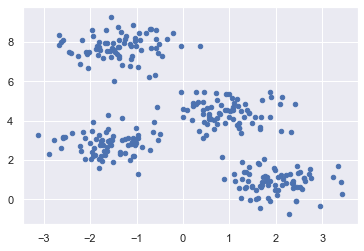

In [26]:
plt.scatter(X[:, 0], X[:, 1], s=20);

By eye, it is relatively easy to pick out the four clusters.

## Standardize

Standardization of a dataset is a common requirement for many methods: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). 

In our case the features were generated and standardization is not necessary. However, the standardization process will be performed to demonstrate the procedure ([see sklearn standardscaler documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler))  

In [27]:
# Standardization of features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

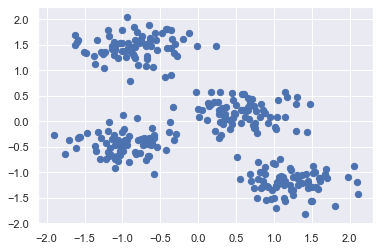

In [28]:
plt.scatter(X_std[:, 0], X_std[:, 1], s=40);

## Algorithm

In [29]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X_std)

KMeans(n_clusters=4)

In [30]:
y_kmeans = kmeans.predict(X_std)
print(y_kmeans)

[1 0 3 0 1 1 2 3 0 0 2 0 3 0 1 3 3 1 2 2 1 1 3 2 2 3 1 3 2 3 0 0 3 0 0 0 0
 0 2 1 3 2 3 3 2 2 0 2 0 1 2 1 0 1 1 2 0 2 0 1 0 3 0 2 2 2 0 1 0 2 3 2 0 2
 2 0 2 3 1 0 1 3 1 1 0 3 1 3 0 0 3 1 0 2 2 3 1 1 3 2 0 1 0 1 3 1 1 3 0 3 2
 2 1 0 1 3 0 1 1 3 2 1 2 1 1 1 1 2 1 2 0 2 2 1 0 2 2 0 3 0 0 2 3 2 3 2 0 3
 0 0 0 3 0 3 1 2 0 2 1 3 0 3 3 1 3 2 2 3 1 3 3 0 1 3 2 0 1 1 3 2 1 3 2 2 3
 3 3 3 1 0 3 2 3 3 2 2 2 3 2 0 3 2 1 2 3 0 2 0 3 0 3 2 3 3 0 2 2 1 1 3 0 1
 1 2 1 2 3 0 0 3 3 0 3 1 2 3 1 2 0 2 1 3 1 0 0 0 0 2 2 0 3 2 1 3 2 2 2 1 1
 0 3 3 2 1 0 2 3 0 3 1 1 2 2 3 1 1 1 3 0 0 1 1 3 1 1 1 0 2 0 3 1 1 0 0 0 1
 1 3 0 2]


Let's visualize the results by plotting the data colored by these labels.
We will also plot the cluster centers as determined by the *k*-means estimator:

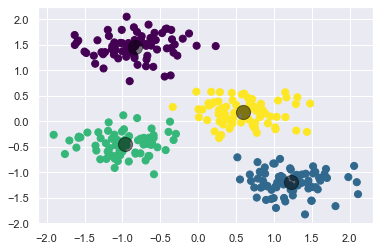

In [31]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [32]:
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X_std)
y_kmeans = kmeans.predict(X_std)
print(y_kmeans)

[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


The good news is that the k-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.
But you might wonder how this algorithm finds these clusters so quickly! After all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.
Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to k-means involves an intuitive iterative approach known as *expectation–maximization*.

## Advanced topics

### Expectation–Maximization-Approach 

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.
The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics. See [Algobeans (2016)](https://algobeans.com/2015/11/30/k-means-clustering-laymans-tutorial/) for a non technical explanation of this method.


There are a few issues to be aware of when using the expectation–maximization algorithm.

- The globally optimal result may not be achieved

In our simple example, the E–M approach has converged to a globally optimal configuration. However, this is not always the case. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (set by the ``n_init`` parameter, which defaults to 10).

- The number of clusters must be selected beforehand

Another common challenge with k-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data.
For example, if we ask the algorithm to identify six clusters, it will proceed and find the best six clusters:

In [33]:
kmeans_2 = KMeans(n_clusters=6, n_init=10)
kmeans_2.fit(X_std)
y_kmeans_2 = kmeans_2.predict(X_std)

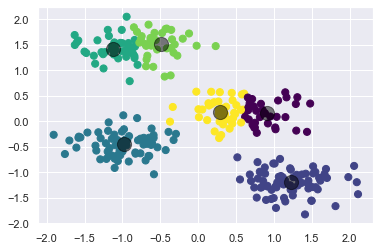

In [34]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans_2, s=50, cmap='viridis')

centers_2 = kmeans_2.cluster_centers_
plt.scatter(centers_2[:, 0], centers_2[:, 1], c='black', s=200, alpha=0.5);

Whether the result is meaningful is a question that is difficult to answer definitively; one approach that is rather intuitive is called [silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

### Linear boundaries

> k-means is limited to linear cluster boundaries

The fundamental model assumptions of k-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between k-means clusters will always be linear, which means that it will fail for more complicated boundaries.
Consider the following data, along with the cluster labels found by the typical k-means approach:

In [35]:
X_moon, y = make_moons(200, noise=.05, random_state=0)

In [36]:
X_moon_std = scaler.fit_transform(X_moon)

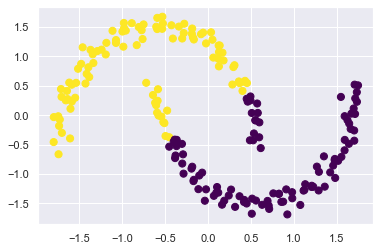

In [37]:
labels = KMeans(2, random_state=0).fit_predict(X_moon_std)
plt.scatter(X_moon_std[:, 0], X_moon_std[:, 1], c=labels, s=50, cmap='viridis');

To deal with this issue, we could use a [kernel transformation](https://en.wikipedia.org/wiki/Kernel_method) to project the data into a higher dimension where a linear separation is possible. This would allow k-means to discover non-linear boundaries.

One version of this kernelized k-means is implemented in Scikit-Learn within the ``SpectralClustering`` estimator.
It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a k-means algorithm:

/Users/jankirenz/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


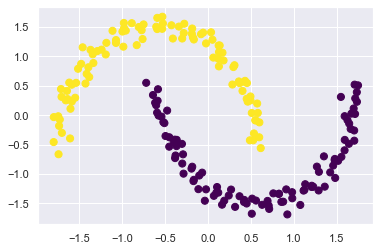

In [38]:
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels = model.fit_predict(X_moon_std)
plt.scatter(X_moon_std[:, 0], X_moon_std[:, 1], c=labels, s=50, cmap='viridis');

We see that with this kernel transform approach, the kernelized *k*-means is able to find the more complicated nonlinear boundaries between clusters.

### Large samples

> k-means can be slow for large numbers of samples

Because each iteration of k-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows. You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step.

This is the idea behind batch-based k-means algorithms, one form of which is implemented in ``sklearn.cluster.MiniBatchKMeans``.
The interface for this is the same as for standard ``KMeans``.

`MiniBatchKMeans` works similarly to KMeans, with one significance difference: the batch_size parameter. batch_size controls the number of randomly selected observations in each batch. The larger the the size of the batch, the more computationally costly the training process ([Albon, 2017](https://chrisalbon.com/machine_learning/clustering/minibatch_k-means_clustering/)).

In [39]:
# Create k-mean object
kmeans_batch = MiniBatchKMeans(n_clusters=4, random_state=0, batch_size=50)
kmeans_batch.fit(X_std)
y_kmeans_batch = kmeans_batch.predict(X_std)

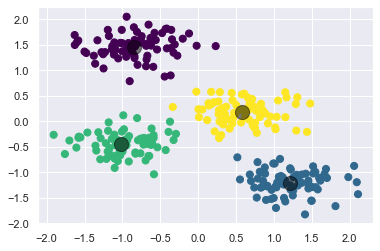

In [40]:
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_kmeans_batch, s=50, cmap='viridis')

centers_batch = kmeans_batch.cluster_centers_
plt.scatter(centers_batch[:, 0], centers_batch[:, 1], c='black', s=200, alpha=0.5);